# Задача о классификации проигрыша и выигрыша в крестики нолики

In [2]:
import pandas as pd

In [2]:
def accuracy(Y_test, Y_pred):
    correct_predictions = (Y_test == Y_pred).sum()
    total_predictions = len(Y_test)
    return correct_predictions/total_predictions

In [3]:
data = pd.read_csv("Tic_tac_toe.txt", sep=",", header=None, names=[str(i) for i in range(1, 10)] + ["final"])
data.head()

,1,2,3,4,5,6,7,8,9,final
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [4]:
data.dtypes

1        object
2        object
3        object
4        object
5        object
6        object
7        object
8        object
9        object
final    object
dtype: object

In [5]:
data.replace(value=2, to_replace="o", inplace=True)
data.replace(value=1, to_replace="x", inplace=True)
data.replace(value=0, to_replace="b", inplace=True)
data.replace(value=1, to_replace="positive", inplace=True)
data.replace(value=0, to_replace="negative", inplace=True)
data

,1,2,3,4,5,6,7,8,9,final
0,1,1,1,1,2,2,1,2,2,1
1,1,1,1,1,2,2,2,1,2,1
2,1,1,1,1,2,2,2,2,1,1
3,1,1,1,1,2,2,2,0,0,1
4,1,1,1,1,2,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...
953,2,1,1,1,2,2,2,1,1,0
954,2,1,2,1,1,2,1,2,1,0
955,2,1,2,1,2,1,1,2,1,0
956,2,1,2,2,1,1,1,2,1,0


In [10]:
from sklearn.model_selection import train_test_split
X = data.drop("final", axis=1)
Y = data["final"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100, shuffle=True)

In [11]:
from sklearn.naive_bayes import GaussianNB

cnb = GaussianNB()
model = cnb.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(X_test.shape[0], (Y_test != Y_pred).sum())

192 45


In [12]:
test_sizes = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
accuracies = []

for test_size in test_sizes:
    X = data.drop("final", axis=1)
    Y = data["final"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state = 42, shuffle=True)
    cnb = GaussianNB()
    model = cnb.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracies.append(accuracy(Y_test, Y_pred))

accuracies

[0.5,
 0.7291666666666666,
 0.7083333333333334,
 0.7447916666666666,
 0.7326388888888888,
 0.6979166666666666,
 0.7244258872651357,
 0.6956521739130435,
 0.6602086438152012,
 0.6336375488917861,
 0.6535341830822712,
 0.6476399560922064,
 0.6111696522655427]

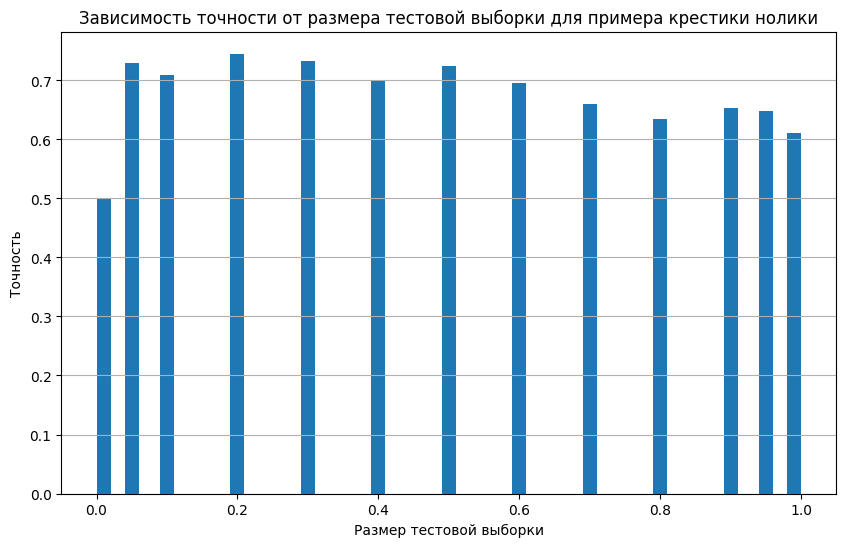

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(test_sizes, accuracies, width=0.02)
plt.title('Зависимость точности от размера тестовой выборки для примера крестики нолики')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.grid(axis='y')
plt.savefig("tic_tac_toe.png")
plt.show()

# Задача о классификации Спама 

In [19]:
with open("spam_names.txt", "r") as f:
    names = f.readlines()
    for i in range(len(names)):
        names[i] = names[i].strip().replace(":", "")
names[:2]

['word_freq_make', 'word_freq_address']

In [20]:
spam_data = pd.read_csv("spambase.data", sep=",", header=None, names=names)
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [21]:
spam_data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [22]:
spam_data.isna().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [23]:
from sklearn.model_selection import train_test_split
X = spam_data.drop("spam", axis=1)
Y = spam_data["spam"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42, shuffle=True)

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(X_test.shape[0], (Y_test != Y_pred).sum())

921 165


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
test_sizes = [x for x in np.arange(0.02, 1, 0.05)]
accuracies = []

for test_size in test_sizes:
    X = spam_data.drop("spam", axis=1)
    Y = spam_data["spam"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state = 42, shuffle=True)
    cnb = GaussianNB()
    model = cnb.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(Y_test, Y_pred))

accuracies

[0.7956989247311828,
 0.8235294117647058,
 0.8354430379746836,
 0.8250319284802043,
 0.8203356367226061,
 0.8222043443282381,
 0.8241683638832314,
 0.8185554903112156,
 0.8153129849974133,
 0.8122977346278317,
 0.8115336397826995,
 0.8074723598932521,
 0.805117420259376,
 0.8008433344145313,
 0.8089345004527618,
 0.8063787750493931,
 0.8115557911476279,
 0.8078940794404197,
 0.8065201984408221,
 0.8061841810441407]

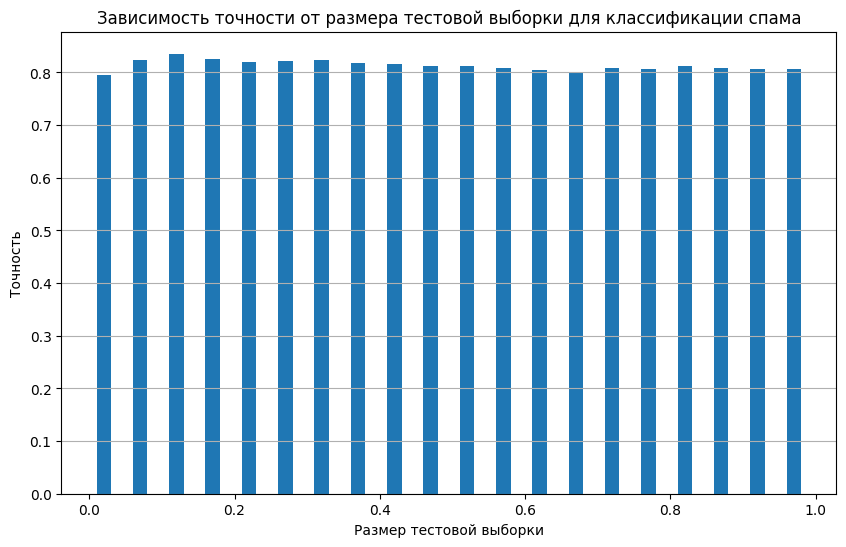

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(test_sizes, accuracies, width=0.02)
plt.title('Зависимость точности от размера тестовой выборки для классификации спама')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.grid(axis='y')
plt.savefig("spam.png")
plt.show()


# Задача классификации ирисов

In [56]:
from sklearn.datasets import load_iris

In [54]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [57]:
X = load_iris().data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [60]:
Y = load_iris().target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42, shuffle=True)

In [83]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(X_test.shape[0], (Y_test != Y_pred).sum())
print(accuracy(Y_test, Y_pred))

30 0
1.0


# Задача классификации сгенерированных точек с заданным мат ожидание и среднеквадратичным отклонением

In [32]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


np.random.seed(42)  

X1_class_minus1 = np.random.normal(10, 4, 50) # 10 - мат ожидание, 4 - среднеквадратичное отклонение (дисперсия), 50 - число точек
X2_class_minus1 = np.random.normal(14, 4, 50)


X1_class_plus1 = np.random.normal(20, 3, 50)
X2_class_plus1 = np.random.normal(18, 3, 50)

X1 = np.concatenate([X1_class_minus1, X1_class_plus1])
X2 = np.concatenate([X2_class_minus1, X2_class_plus1])
Y = np.array([-1]*50 + [1]*50)


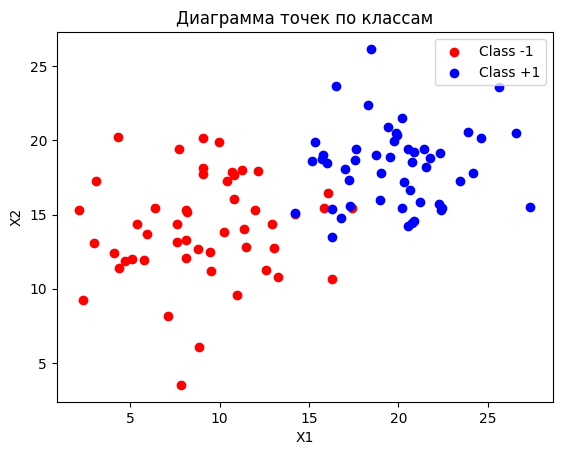

In [33]:
plt.scatter(X1_class_minus1, X2_class_minus1, color='red', label='Class -1')
plt.scatter(X1_class_plus1, X2_class_plus1, color='blue', label='Class +1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Диаграмма точек по классам')
plt.savefig("generated_points.png")
plt.show()

In [34]:
X = np.column_stack([X1, X2])
model = GaussianNB()
model.fit(X, Y)

Y_pred = model.predict(X)
accuracy = accuracy_score(Y, Y_pred)
print(f"Точность классификации: {accuracy:.2f}")

Точность классификации: 0.96


# Titanic

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.loc[df["Fare"] > 400, "Fare"] = df["Fare"].median()

In [5]:
df.loc[df["Age"] > 70, "Age"] = 70

In [6]:
for column in df:
    print(column, ": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [39]:
df["Age"].fillna(df["Age"].median(), inplace = True)

In [40]:
df["Embarked"].fillna("S", inplace = True)

In [41]:
del df["Cabin"]

In [42]:
for column in df:
    print(column, ": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Embarked :  0


In [43]:
def get_title(name): # Miss, Mrs, Capitan...
    if "." in name:
        return name.split(",")[1].split(".")[0].strip()
    else:
        return "No title"

In [44]:
titles = set([x for x in df.Name.map(lambda x: get_title(x))])
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [45]:
def shorter_titles(x):
    title = x["Title"]
    if title in ["Capt", "Col", "Major"]:
        return "Officer"
    elif title in ["Jonkheer", "Don", "the Countess", "Dona", "Lady", "Sir"]:
        return "Royalty"
    elif title == "Mme":
        return "Mrs"
    elif title in ["Mlle", "Ms"]:
        return "Miss"
    else:
        return title

In [46]:
df["Title"] = df["Name"].map(lambda x: get_title(x))
df["Title"] = df.apply(shorter_titles, axis = 1)
df.Title.value_counts()
df.drop("Name", axis = 1, inplace = True)
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
231,232,0,3,male,29.0,0,0,347067,7.7750,S,Mr
422,423,0,3,male,29.0,0,0,315082,7.8750,S,Mr
43,44,1,2,female,3.0,1,2,SC/Paris 2123,41.5792,C,Miss
348,349,1,3,male,3.0,1,1,C.A. 37671,15.9000,S,Master
552,553,0,3,male,28.0,0,0,330979,7.8292,Q,Mr
127,128,1,3,male,24.0,0,0,C 17369,7.1417,S,Mr
834,835,0,3,male,18.0,0,0,2223,8.3000,S,Mr
358,359,1,3,female,28.0,0,0,330931,7.8792,Q,Miss
472,473,1,2,female,33.0,1,2,C.A. 34651,27.7500,S,Mrs
115,116,0,3,male,21.0,0,0,STON/O 2. 3101294,7.9250,S,Mr


In [47]:
df.Sex.replace(("male", "female"), (0, 1), inplace = True)
df.Embarked.replace(("S", "C", "Q"), (0, 1, 2), inplace = True)
df.Title.replace(("Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Officer", "Royalty"), (0, 1, 2, 3, 4, 5, 6, 7), inplace = True)
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
70,71,0,2,0,32.0,0,0,C.A. 33111,10.5000,0,0
881,882,0,3,0,33.0,0,0,349257,7.8958,0,0
253,254,0,3,0,30.0,1,0,A/5. 3336,16.1000,0,0
275,276,1,1,1,63.0,1,0,13502,77.9583,0,1
728,729,0,2,0,25.0,1,0,236853,26.0000,0,0
96,97,0,1,0,70.0,0,0,PC 17754,34.6542,1,0
82,83,1,3,1,28.0,0,0,330932,7.7875,2,1
111,112,0,3,1,14.5,1,0,2665,14.4542,1,1
585,586,1,1,1,18.0,0,2,110413,79.6500,0,1
382,383,0,3,0,32.0,0,0,STON/O 2. 3101293,7.9250,0,0


In [7]:
Y = df["Survived"]
X = df.drop(["Survived","PassengerId", "Ticket"], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model = GaussianNB()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Точность классификации: {accuracy:.2f}")

NameError: name 'train_test_split' is not defined

In [49]:
df_test = pd.read_csv("test.csv")
df_test["Title"] = df_test["Name"].map(lambda x: get_title(x))
df_test["Title"] = df_test.apply(shorter_titles, axis = 1)
ids = df_test["PassengerId"]
df_test["Age"].fillna(df["Age"].median(), inplace = True)
df_test["Fare"].fillna(df["Fare"].median(), inplace = True)
df_test["Embarked"].fillna("S", inplace = True)
df_test.drop("Cabin", axis = 1, inplace = True)
df_test.drop("Ticket", axis = 1, inplace = True)
df_test.drop("Name", axis = 1, inplace = True)
df_test.drop("PassengerId", axis = 1, inplace = True)
df_test.Sex.replace(("male", "female"), (0, 1), inplace = True)
df_test.Embarked.replace(("S", "C", "Q"), (0, 1, 2), inplace = True)
df_test.Title.replace(("Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Officer", "Royalty"), (0, 1, 2, 3, 4, 5, 6, 7), inplace = True)

In [50]:
predictions = model.predict(df_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,